In [1]:
# notebook import 

from ipynb.fs.full.data_processing import *

In [2]:
# user input parameters

# boolean parameter to dictate whether figures are saved
save = True

# boolean parameter to dictate whether figures are plotted with the point at start point
start = True

# boolean parameter to dictate whether figures are plotted with the relative temperature
temp = False

# number over which the plot of temperature will be averaged 
temp_avg = 10

# list of numbers over which the plot of entropy will be averaged 
entropy_avg = [0, 10, 20]

# dictionary mapping each plotted line to its corresponding color in figures
color_dict = {'gfp':'green', 'rfp':'red', 'area':'blue'}

# list of colors corresponding to specific wells used in figures
colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'yellowgreen', 'limegreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink']


In [3]:
# function declaration 

# input: None
# output: dictionary mapping each feature to a dictionary of wells mapped to theis lists of entropy through time
def get_entropy_dict():
    res = {}
    for feature in feature_name_list:
        res[feature] = {}
        for well in well_id_list: 
            entropy_series = pd.read_csv(results_fpath + entropy_ext + f'{feature}_{well}_entropy_list.csv')['entropy']
            res[feature][well] = entropy_series
    return res

# input: dictionary mapping each feature to a dictionary of wells (entropy_dict), feature of interest (feature), and an average over which entropies will be plotted
# output: None (plots entropy as a function of time)
def plot_entropy_all(feature, avg):
    
    for well, color in zip(well_id_list, colors):
        
        x, y = avg_plot(timestep_scaled, entropy_dict[feature][well], avg)
        plt.plot(x, y, label=f'{well}', color=color)
    
    if temp:
        scaled_temp = scale(temp_series, entropy_dict[feature]['06'])
        x_temp, y_temp = avg_plot(temp_mins, scaled_temp, temp_avg)
        plt.plot(x_temp, y_temp, color='black', label="Relative Temperature")
        
    if start:
        plt.axvline(start_plot, color='gray', linestyle='--', label=f'Start')
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{proper_feature[feature]} entropy as a function of time')
    plt.xlabel('Time (min)')
    plt.ylabel('Entropy (bit)')
    
    if save: 
        plt.savefig(results_fpath + entropy_ext + f'/entropy_all_plots/{feature}_entropy_all_{avg}{ext}.png', dpi=300,  bbox_inches='tight')
        
    plt.show()
    return

def plot_entropy_well(well, avg):
    
    for feature in ['gfp', 'rfp']: 
        x, y = avg_plot(timestep_scaled, entropy_dict[feature][well], avg)
        plt.plot(x, y, label=f'{proper_feature[feature]}', color=color_dict[feature])
    
    if temp:
        scaled_temp = scale(temp_series, entropy_dict['gfp'][well])
        x_temp, y_temp = avg_plot(temp_mins, scaled_temp, temp_avg)
        plt.plot(x_temp, y_temp, color='black', label="Relative Temperature")
        
    if start:
        plt.axvline(start_plot, color='gray', linestyle='--', label=f'Start')
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Entropy as a function of time ({well})')
    plt.xlabel('Time (min)')
    plt.ylabel('Entropy (bit)')
    
    if save: 
        plt.savefig(results_fpath + entropy_ext + f'/entropy_well_plots/entropy_well_{well}_{avg}{ext}.png', dpi=300,  bbox_inches='tight')
        
    plt.show()
    return
    

In [4]:
# `main()` function declaration

# intended use in coordination with `entropy_calculation.ipynb`
# requires: import of `data_processing.ipynb` and user input parameters specified above
# output: None (reads data files and produces line and matrix plots of pairwise mutual information)

def main():
    
    # declare global variable ext for filepath of saved figure
    global ext
    ext = ''
    if temp:
        f'_temp_{temp_avg}'
    if start:
        ext += '_start'
      
    global entropy_dict
    entropy_dict = get_entropy_dict()
    
    for feature in feature_name_list:
        
        for avg in entropy_avg:
        
            plot_entropy_all(feature, avg)
            
    for well in well_id_list:
        
        for avg in entropy_avg:
            if avg < 20:
                plot_entropy_well(well, avg)
            
    return     

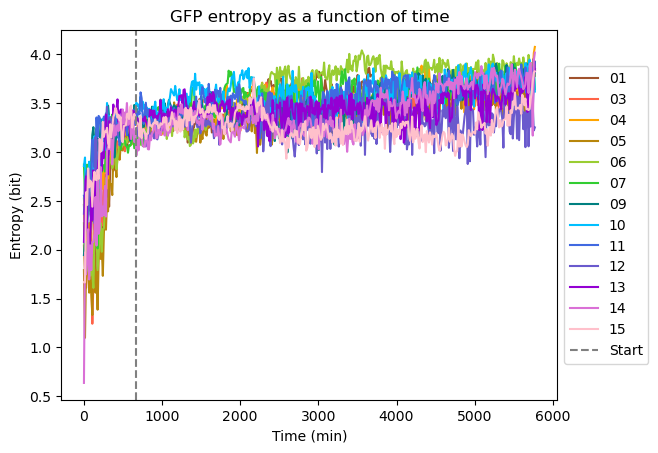

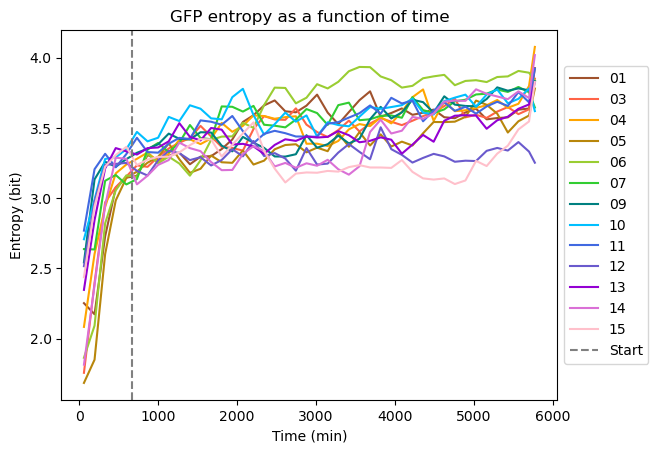

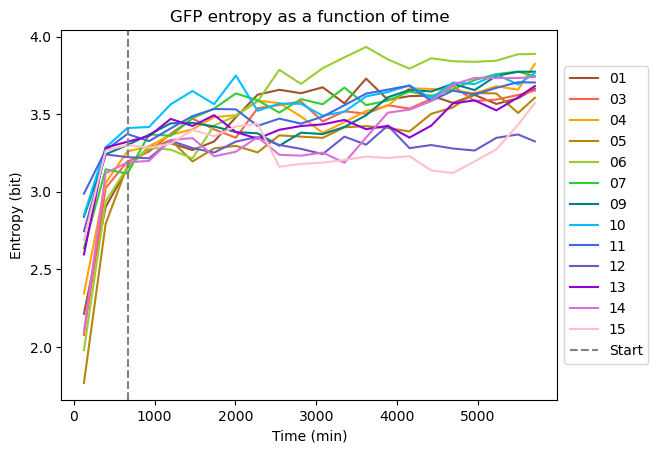

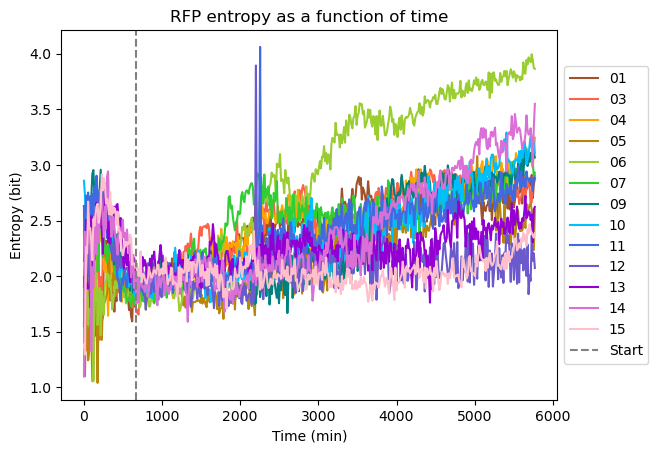

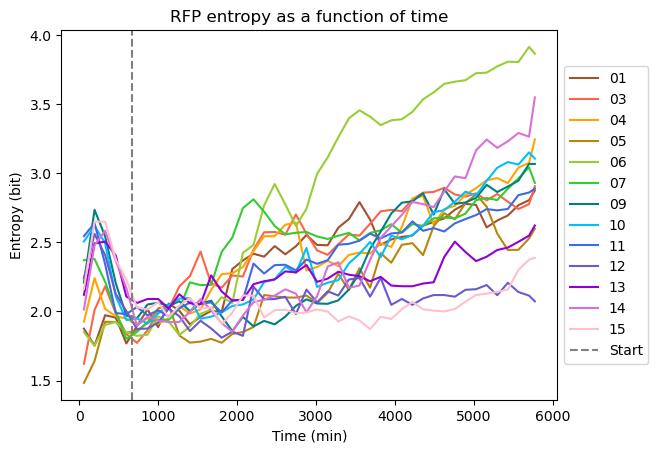

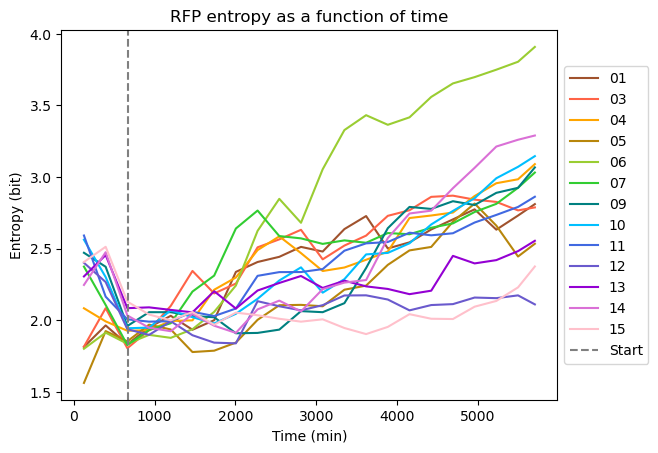

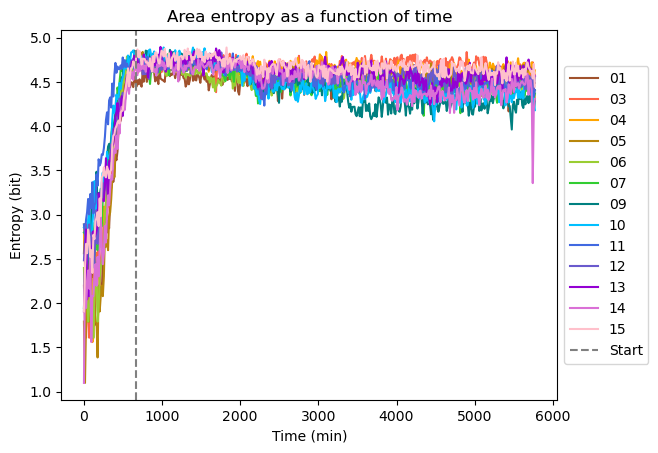

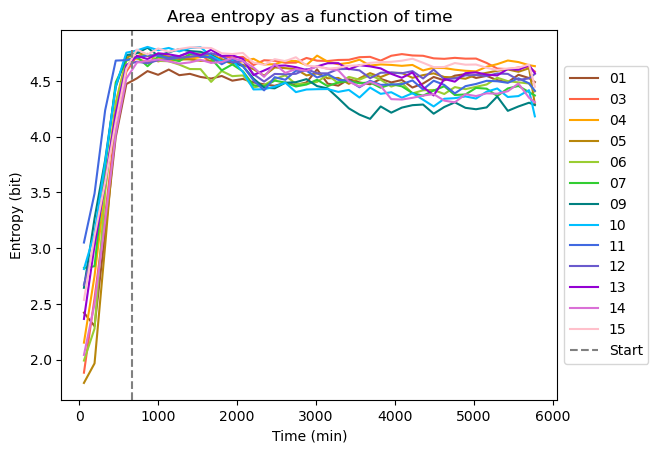

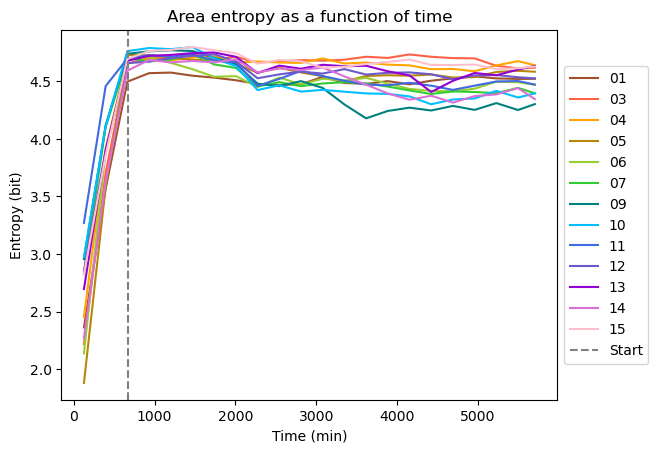

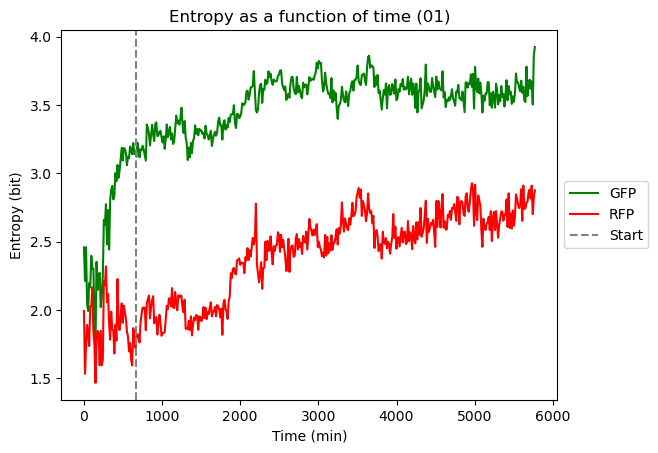

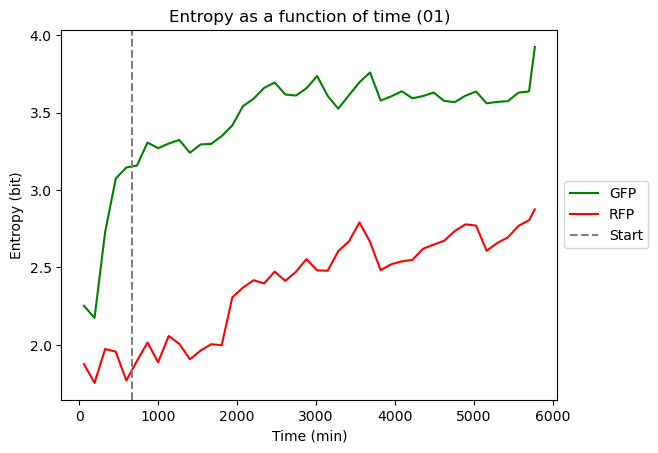

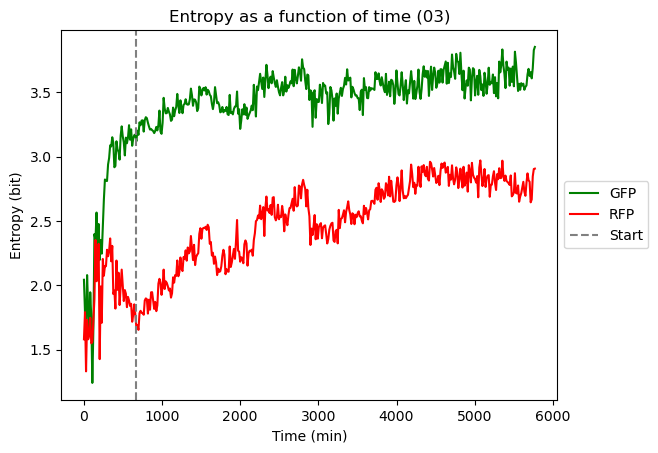

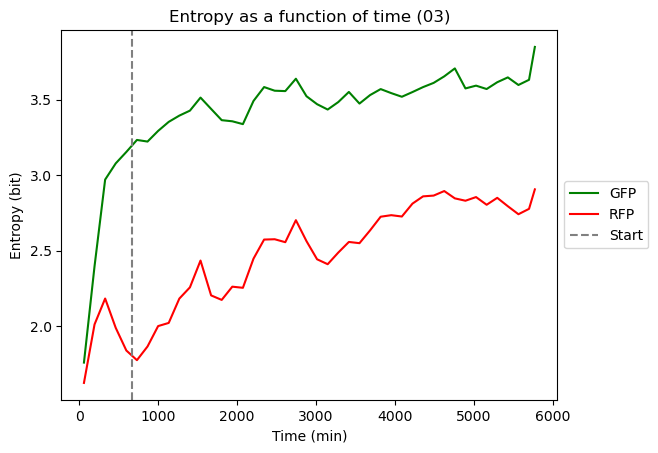

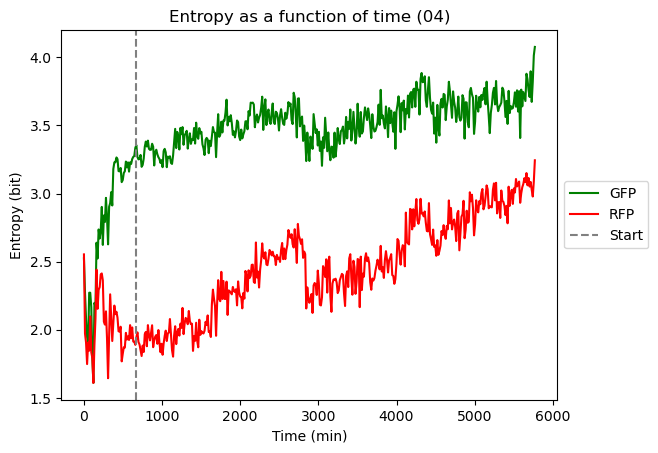

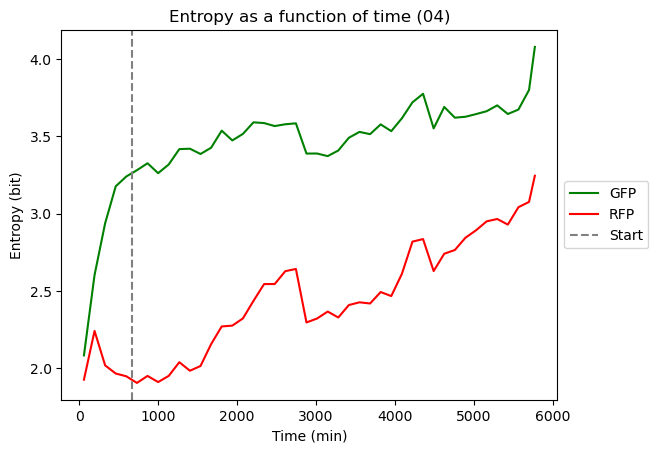

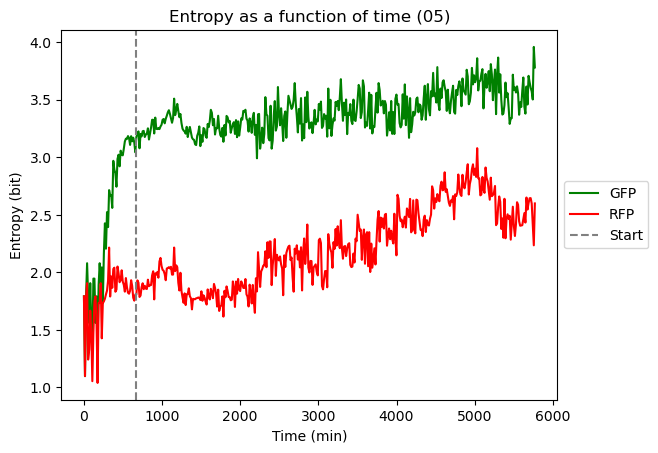

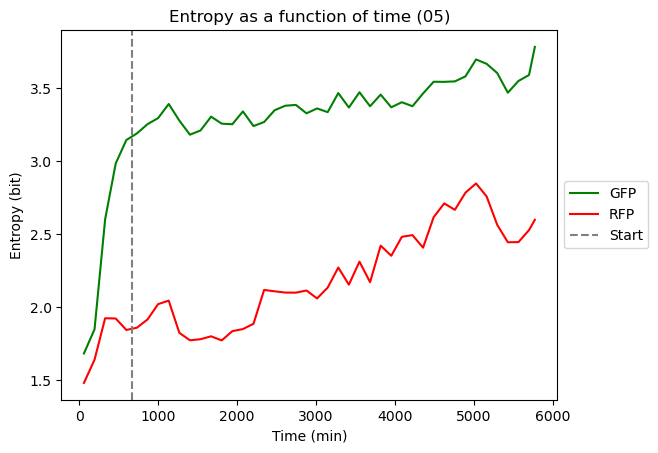

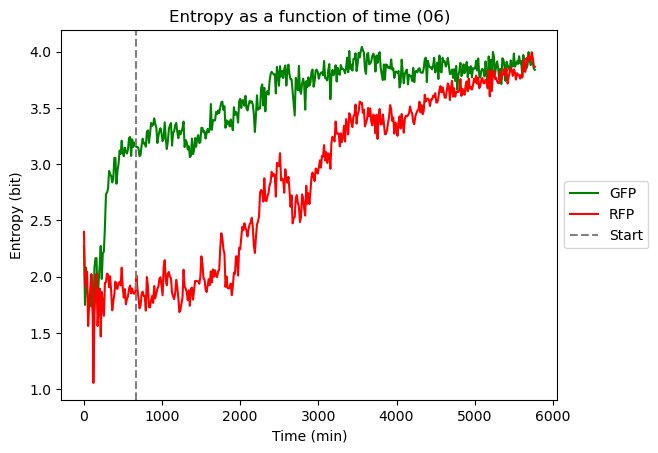

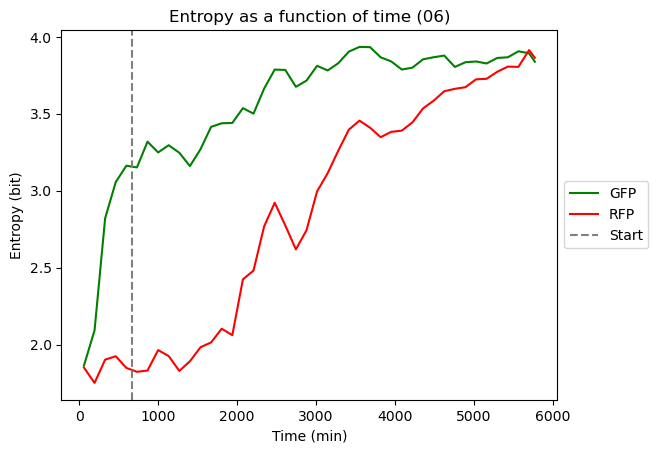

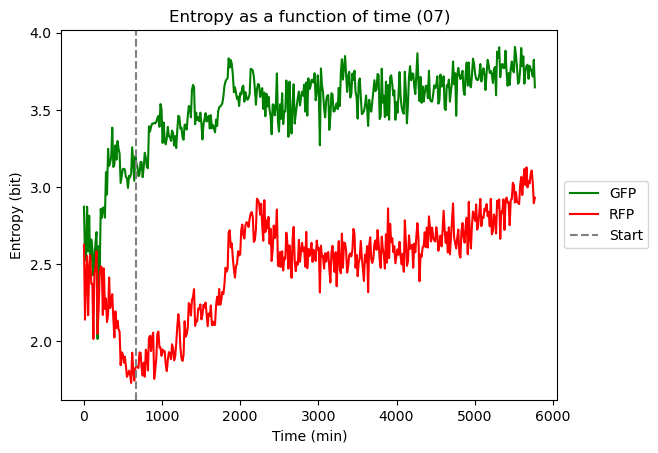

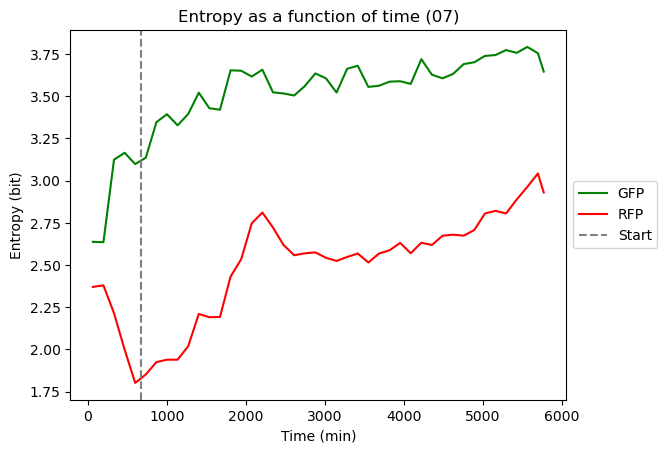

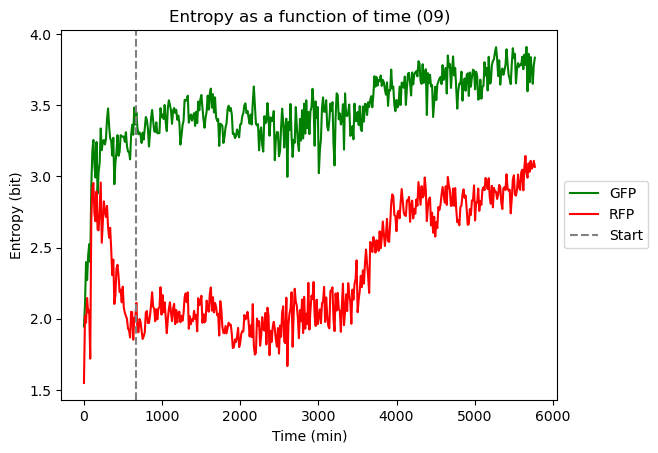

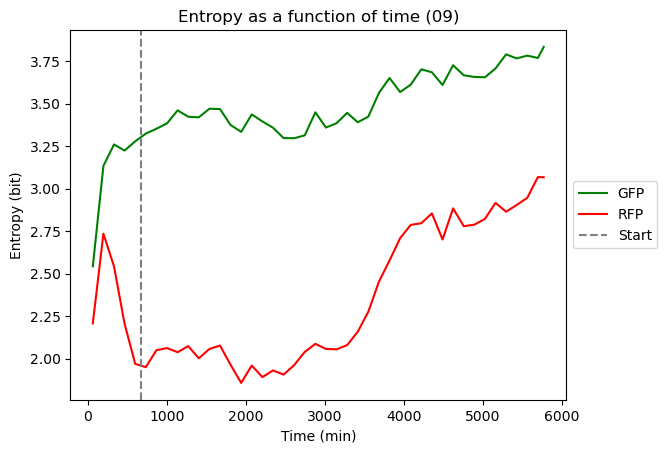

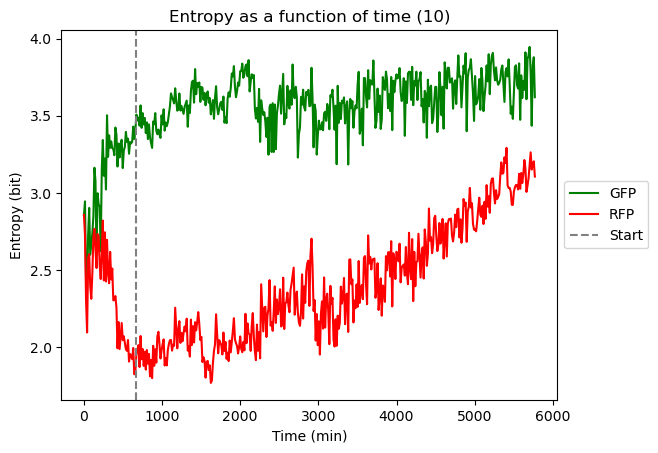

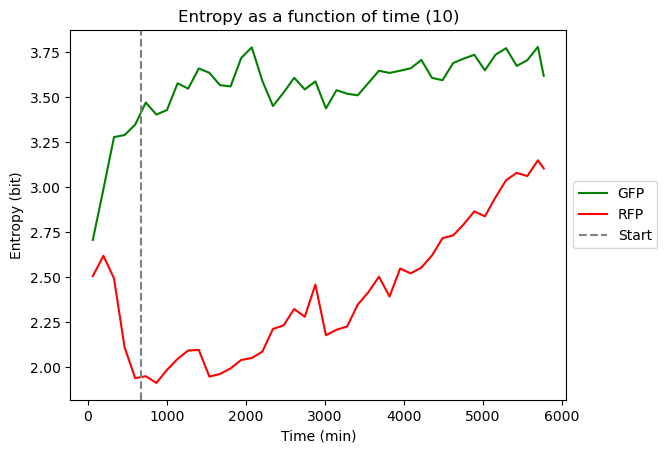

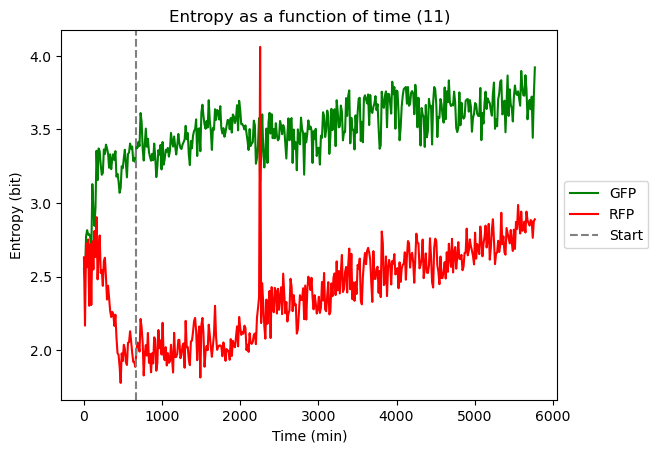

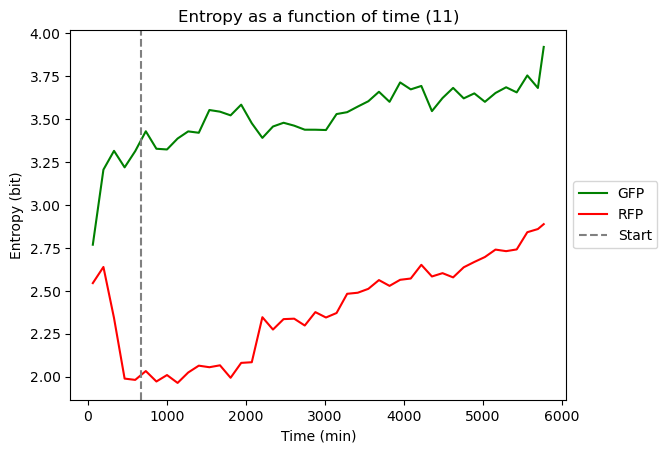

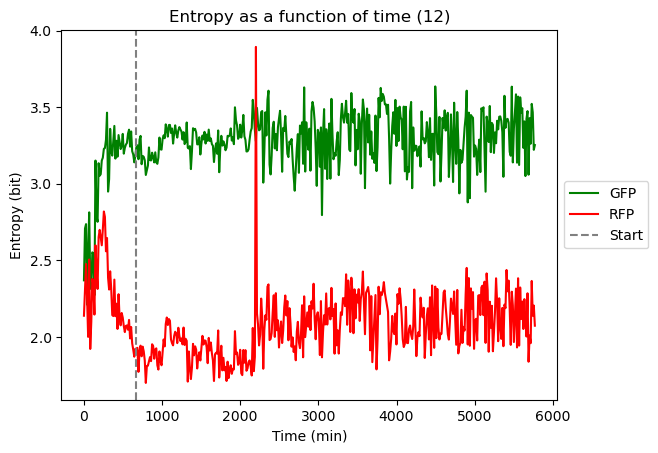

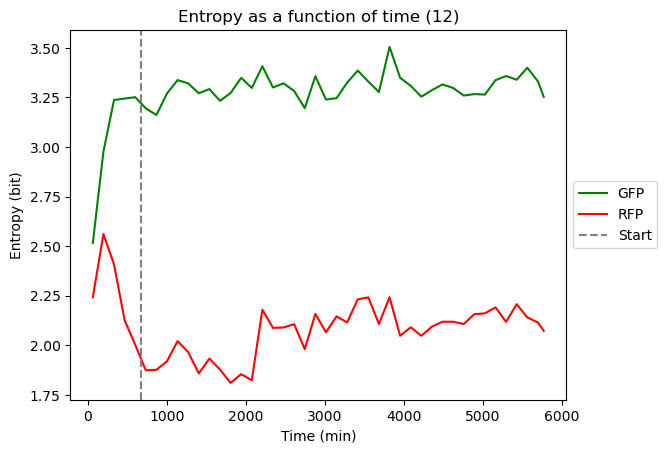

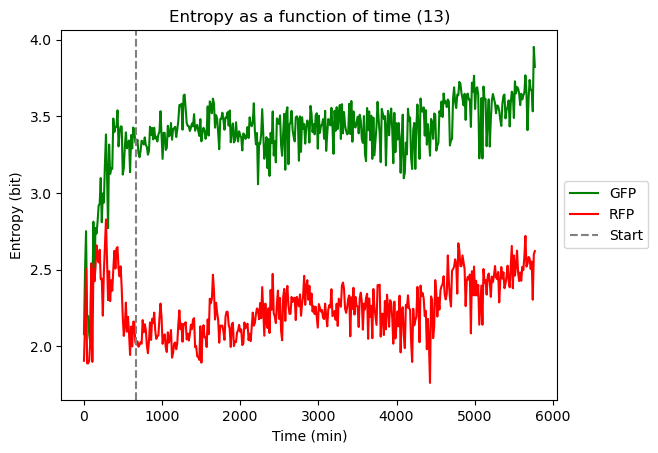

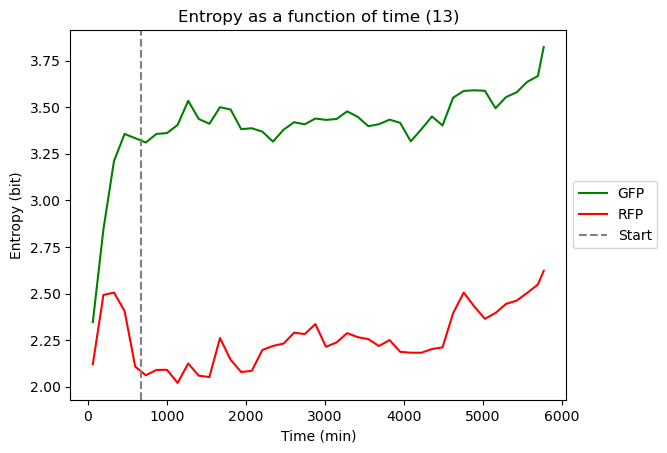

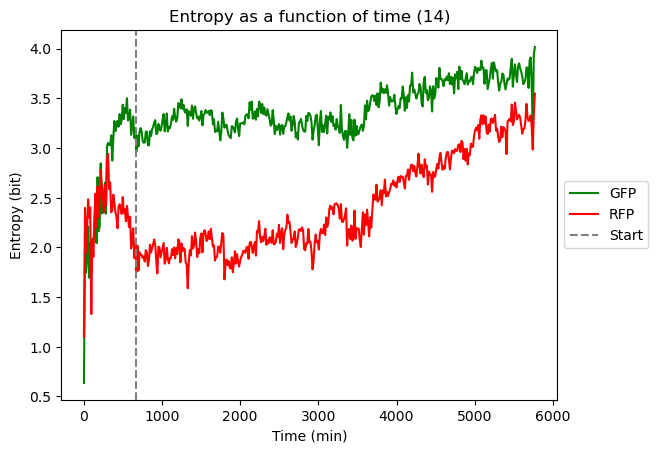

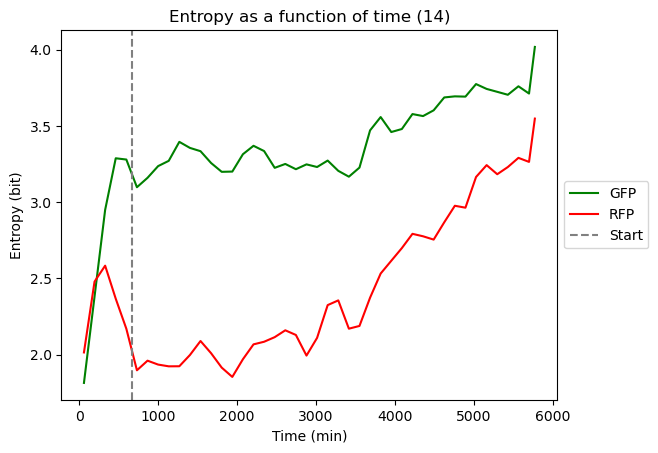

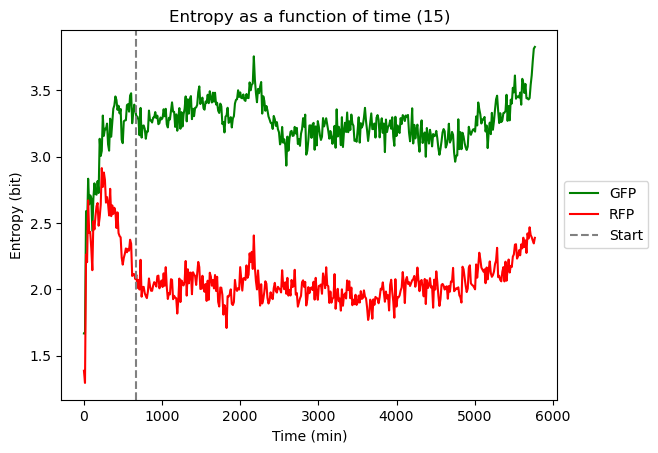

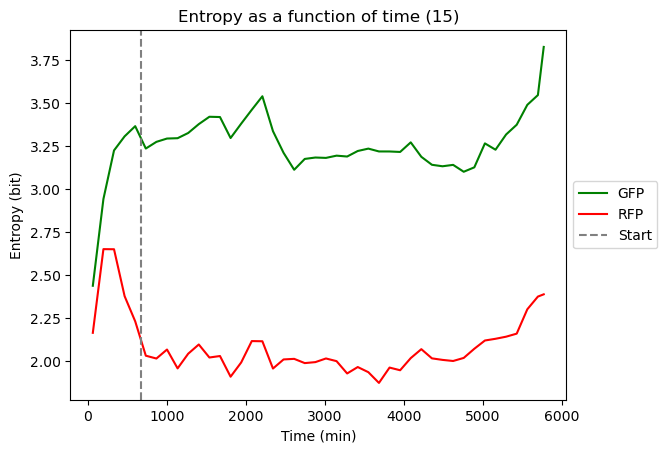

In [5]:
# call to `main()` function

main()